<a href="https://colab.research.google.com/github/kitty57/classifiers/blob/main/classifiers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cat or not

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 229MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.167518,0.025017,0.010149,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.052629,0.037546,0.009472,00:50


In [ ]:
# @title
import requests
from PIL import Image
from io import BytesIO

url = 'https://th.bing.com/th/id/OIP.CBFZpMOFqyCjyHOJxouwVAHaE8?pid=ImgDet&rs=1'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img=img.resize((224,224))
is_cat,_,probs=learn.predict(img)
print(f"is this a cat?:{is_cat}")
print(f"probability it's a cat:{probs[1].item():.6f}")

is this a cat?:True
probability it's a cat:1.000000


### segmentation example

In [2]:
path=untar_data(URLs.CAMVID_TINY)
dls=SegmentationDataLoaders.from_label_func(
    path,bs=8,fnames=get_image_files(path/"images"),
    label_func=lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt',dtype=str)
)

In [3]:
learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.807267,2.066191,00:01


epoch,train_loss,valid_loss,time
0,1.827052,1.542306,00:01
1,1.557911,1.277959,00:01
2,1.422715,1.180769,00:01
3,1.281592,0.978029,00:01
4,1.147380,0.812593,00:01
5,1.032207,0.801700,00:01
6,0.937596,0.756009,00:01
7,0.866086,0.753284,00:01


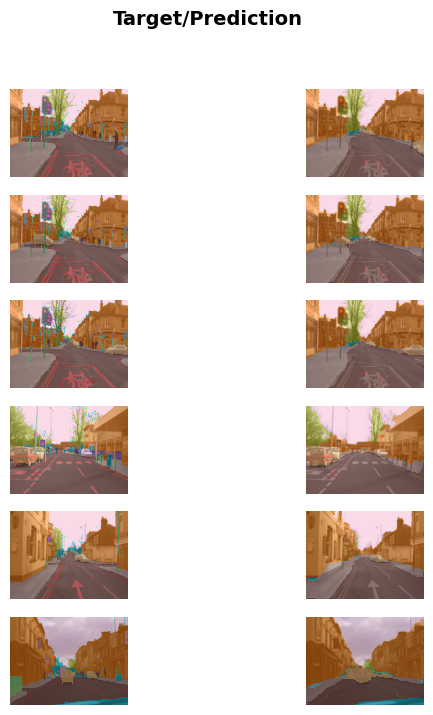

In [4]:
learn.show_results(max_n=6,figsize=(7,8))

### NLP example

In [5]:
from fastai.text.all import *
dls=TextDataLoaders.from_folder(untar_data(URLs.IMDB),
                                valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5,metrics=accuracy)
learn.fine_tune(4,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.457065,0.400862,0.819640,03:25


epoch,train_loss,valid_loss,accuracy,time
0,0.300434,0.449955,0.824320,07:15


epoch,train_loss,valid_loss,accuracy,time
0,0.300434,0.449955,0.824320,07:15
1,0.248223,0.201868,0.922360,07:15
2,0.192794,0.211362,0.914760,07:16
3,0.154631,0.196874,0.927760,07:16


In [6]:
learn.predict("I don't really know how to react after watching the movie!")

('pos', tensor(1), tensor([0.2122, 0.7878]))

### Working with tables

In [7]:
from fastai.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)
dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
                                cat_names=['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],procs = [Categorify, FillMissing, Normalize])
learn= tabular_learner(dls,metrics=accuracy)

In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.391941,0.359308,0.836456,00:06
1,0.355228,0.352529,0.834613,00:05
2,0.346111,0.348688,0.838452,00:04


***example 2***

In [10]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
dls=CollabDataLoaders.from_csv(path/'ratings.csv')
learn=collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510990,1.415165,00:00


epoch,train_loss,valid_loss,time
0,1.381100,1.362945,00:00
1,1.296450,1.199108,00:00
2,1.061723,0.888843,00:00
3,0.816570,0.733800,00:00
4,0.693230,0.697803,00:00
5,0.646923,0.687597,00:00
6,0.612302,0.682088,00:00
7,0.604638,0.680317,00:00
8,0.595361,0.679163,00:00
9,0.592402,0.679109,00:00


In [11]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,77.0,16.0,4.0,4.261560
1,59.0,8.0,4.0,4.183933
2,35.0,38.0,5.0,2.996807
3,89.0,82.0,1.0,4.233504
4,86.0,70.0,4.5,3.566034
5,92.0,32.0,2.0,3.152869
6,14.0,69.0,5.0,3.922758
7,26.0,71.0,4.5,3.958710
8,57.0,64.0,4.0,3.549562


### Is it a Fruit or a veggie?

In [12]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


In [14]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term,max_images=30):
  print(f"searching for '{term}'")
  return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [16]:
urls= search_images('fruit images',max_images=1)
urls[0]

searching for 'fruit images'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://www.graciemag.com/wp-content/uploads/2014/12/GM-White-Page-214.jpg'

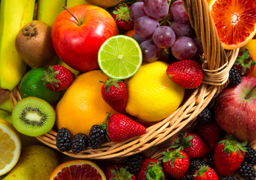

In [18]:
from fastdownload import download_url
from fastai.vision.all import *
dest='fruits.jpg'
download_url(urls[0],dest,show_progress=False)
im=Image.open(dest)
im.to_thumb(256,256)

searching for 'veggies photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


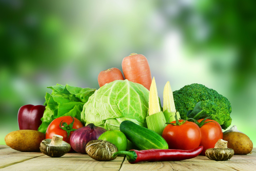

In [19]:
download_url(search_images('veggies photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [22]:
searches='fruit','veggie'
path=Path('fruit_or_veggie')
from time import sleep
for o in searches:
  dest=(path/o)
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest,urls=search_images(f'{o} photo'))
  sleep(10)
  resize_images(path/o,max_size=200,dest=path/o)


searching for 'fruit photo'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


searching for 'veggie photo'


In [23]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

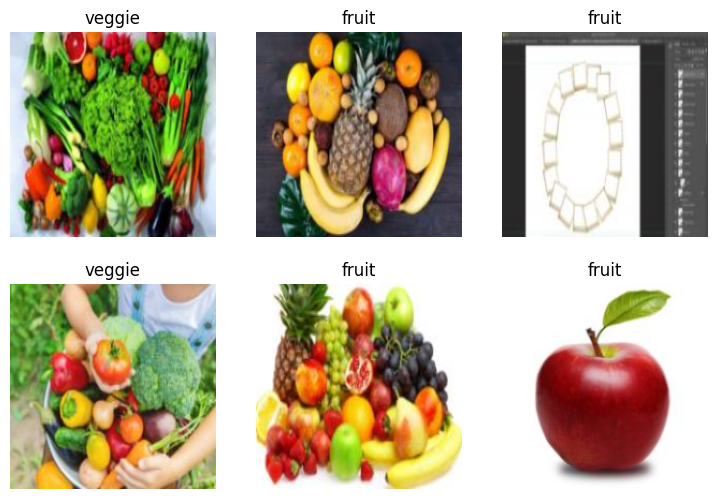

In [35]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)
dls.show_batch(max_n=6)

In [36]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(20)


epoch,train_loss,valid_loss,error_rate,time
0,1.101181,2.417700,0.739130,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.896068,2.563322,0.695652,00:00
1,0.706243,2.271230,0.695652,00:00
2,0.662350,1.885640,0.652174,00:00
3,0.537992,1.575926,0.565217,00:00
4,0.457837,1.332287,0.478261,00:00
5,0.447336,1.243704,0.434783,00:00
6,0.397448,1.136971,0.347826,00:00
7,0.365018,1.096872,0.304348,00:00
8,0.334393,0.947273,0.304348,00:00
9,0.298174,0.766716,0.304348,00:01


In [39]:
p,_,probs=learn.predict(PILImage.create('fruits.jpg'))
print(f"This is a: {p}.")
print(f"Probability it's fruit: {probs[0]:.4f}")

This is a: fruit.
Probability it's fruit: 0.9878
